## Data Analysis Project Titanic 

In this study, I will focus my attention on the surviving rate of passengers on board the Titanic. 

I would like to understand if there was a significant difference in survived people between the one that were traveling alone on the ship and the one that were on board with other family members. To do so I will create a new variable called Alone that will indicate for 0 that the passenger was traveling alone and 1 with one or more relatives. I will make use of the variable SibSb and Parch to know if the passengers were traveling alone or not. Although we do not have information about friends or unidentified couples on board. At the begin I will focus my attention to the general case and then later I will continue this investigation for women and men separately. 

Secondly, I would like to investigate the difference in the ticket fare among the passengers that survived and the passengers that did not. I would like to consider this information as the status of the passenger in state of using class that were only 3. I could be much more helpful have the information about the salary of the passenger but we do not have it.  

Before looking for an answer to my question I will import the data using Panda functions for CSV and I will check the data imported looking for anomalies that could compromise my research. I will use the function describe looking for strange values and the function isnull to understand how many values are missing in the table.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic-data.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

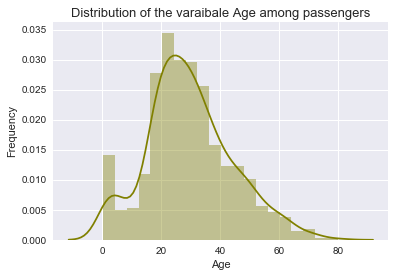

In [6]:
sns.distplot(titanic['Age'][np.isfinite(titanic['Age'])],hist=True, rug=False, color = 'olive', axlabel = 'Fare')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of the varaibale Age among passengers',size = 13)

The first thigs that I notice is that this data does not contain all the data about the passengers on board the Titanic. In fact, we have in this table 891 passengers while on board the titanic were 1316 passengers and 908 crew members. So, our study will be not exhaustive as if we were in possess of all the information.     
But in this histogram, that shows the distributions of the variable Age over passengers, we can notice a shape similar to a normal distribution, and we can suppose to have a valid sample of all the passengers on board the titanic. 
Secondly we can notice that we have some fields missing, for 177 passengers we do not have information about the age and for 687 we do not know the cabin and finally for 2 passengers we do not have the embarked port. Considered what will be the focus of this study, these missing fields will be not be an issue, they will be not be used. 
On the other hand, Survived, Sex, Fare, SibSp and Parch, the variables of interests in this study are not missing. 
Although, there is one thing that catch my attention, and it is the minimum value of Fare (0.00) and the maximum. I will therefor investigate later these values to try answering correctly at my second question.

I will now perform some modification to the table. 
I will change the value of Sex transforming it to integer (0=male, and 1=female). 
I will transform the Embarked value to an integer as well (S=1, Q=2, C=3) respecting the time frame of the embarking.  Untimely I will add a new column called 'Alone'. This will be an integer 0 or 1, calculated over the two columns SibSp and Parch (0=NotAlone, 1=Alone).  
To perform all this, I will define 3 function.

In [7]:
def port(x):
    if x == 'S':
        x =1
    elif x == 'Q':
        x =2
    elif x == 'C':
        x =3 
    return x 

def gender(x):
    if x == 'male':
        x = 0 
    elif x == 'female':
        x = 1 
    return x

def alone(x):
    if x >= 1:
        x = 0
    else:
        x = 1
    return x 

In [8]:
titanic['Embarked']= titanic['Embarked'].apply(port)

In [9]:
titanic['Sex']= titanic['Sex'].apply(gender)

In [10]:
titanic['Alone'] = titanic['SibSp'] + titanic['Parch']
titanic['Alone'] = titanic['Alone'].apply(alone)

In [11]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,3.0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0,1


## Analysis of Alone variable 
We have now more possibilities to work with the data. 
I'm gonna plot now the distribution of passengers that were alone or not. 

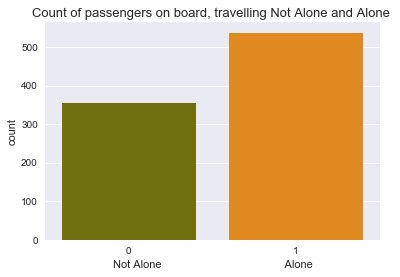

In [12]:
sns.countplot(x = 'Alone', data = titanic,palette=['Olive','DarkOrange'])
plt.xlabel('Not Alone                                         Alone')
plt.title('Count of passengers on board, travelling Not Alone and Alone ',size = 13)

We can see from the plot above that in our data we have more passengers traveling alone then passengers not. 
I will now group by the Alone variable and see if there is a significant difference in the Survived mean among these passengers.

In [13]:
titanic.groupby('Alone')['Survived'].describe()

Alone       
0      count    354.000000
       mean       0.505650
       std        0.500676
       min        0.000000
       25%        0.000000
       50%        1.000000
       75%        1.000000
       max        1.000000
1      count    537.000000
       mean       0.303538
       std        0.460214
       min        0.000000
       25%        0.000000
       50%        0.000000
       75%        1.000000
       max        1.000000
Name: Survived, dtype: float64

In order to evaluate the independence of these two categorical variables, I will make use of the Chi-Square Test for Independence. The Null hypothesis is that the two variables, Alone and Survived, are independent. The alternative hypothesis is that knowing the value of the first could help predict the second. 
- H0: Alone and Survived are independent. 
- H1: Alone A and Survived are not independent.

For this test we are going to set a significant level of 0.05 (α).                   

To do so, I will create a function that could be used later on.

In [14]:
def chitest2x2(x,y):
    a = x[x==0].count()
    b = x[x==1].count()
    c = y[y==0].count()
    d = y[y==1].count()
    Chi = (((a*d-b*c)**2)*(a+b+c+d))/((a+b)*(c+d)*(b+d)*(a+c))
    print ('The Chi Square score is:', Chi )

I will create 2 series for passengers on board , Alone and not Alone, with only the survived variable. 

In [15]:
not_alone = titanic['Survived'][titanic['Alone']==0]
alone = titanic['Survived'][titanic['Alone']==1]

In [16]:
chitest2x2(not_alone,alone)

The Chi Square score is: 36.8501308475


In this case the P-value is the probability that a chi-square statistic having 1 degrees of freedom is more extreme than 36.85. In this case, we have P(Χ²>36.85) ≤ 0.0001. Since this value is less than the significant level (0.05), we can reject the null hypothesis, and we can suppose that there is a relationship between the two variable.

To continue in this direction, I will now divide the dataset using the variable Sex, and look if is there a difference in surviving rate when passengers where alone or not.

In [17]:
sex_notalone = titanic[['Survived','Sex']][titanic['Alone']==0]
female_notalone = sex_notalone[sex_notalone['Sex']==1]
male_notalone = sex_notalone[sex_notalone['Sex']==0]
sex_alone = titanic[['Survived','Sex']][titanic['Alone']==1]
female_alone = sex_alone[sex_alone['Sex']==1]
male_alone = sex_alone[sex_alone['Sex']==0]

I will now plot the for different group to understand better how many passengers were alone or not, by their gender.

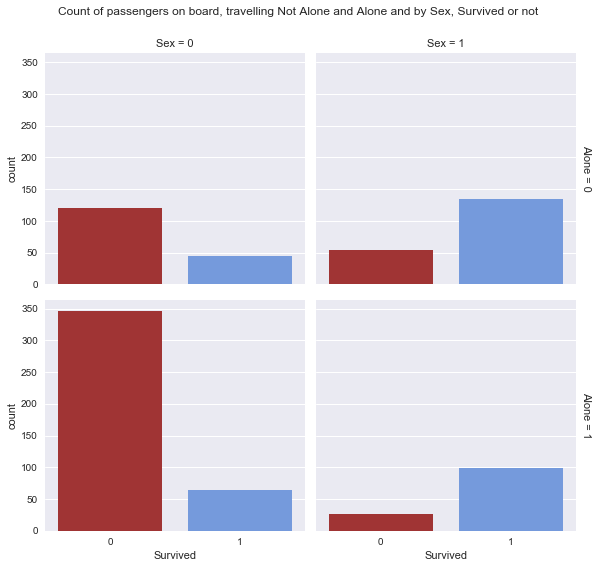

In [18]:
g = sns.factorplot("Survived", row="Alone", col="Sex", margin_titles=True,data=titanic,kind="count",palette=['firebrick','cornflowerblue'])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Count of passengers on board, travelling Not Alone and Alone and by Sex, Survived or not')

First in the above plot we can see the difference among gender, eventually we can notice that the data show an opposite direction when we look at survived passengers.                    
The following data will help better understand this.

In [19]:
print ('In our Data set : ')
print ('There were', male_notalone['Survived'].count(),'male not alone on board, only',"%.0f"%(male_notalone['Survived'][male_notalone['Survived']==1].count())
       ,'survived')
print ('There were', male_alone['Survived'].count(),'male alone on board, only',"%.0f"%(male_alone['Survived'][male_alone['Survived']==1].count())
       ,'survived')
print ('There were', female_notalone['Survived'].count(),'female not alone on board, only',"%.0f"%(female_notalone['Survived'][female_notalone['Survived']==1].count())
       ,'survived')
print ('There were', female_alone['Survived'].count(),'female alone on board, only',"%.0f"%(female_alone['Survived'][female_alone['Survived']==1].count())
       ,'survived')

In our Data set : 
There were 166 male not alone on board, only 45 survived
There were 411 male alone on board, only 64 survived
There were 188 female not alone on board, only 134 survived
There were 126 female alone on board, only 99 survived


Looking at the data we can notice a difference between the two means, alone or not alone, but the result is opposite by sex.                               
The mean of survived women traveling alone is 0.786 and not alone is 0.713 while for survived men alone is 0.156 and not alone is 0.271. 

In order to evaluate the independence of these two categorical variables, I will make use of the Chi-Square Test for Independence. I will perform this test using the function defined before, and in this case for female and male separately.         
The Null hypothesis is that the two variables, Alone and Survived, are independent. The alternative hypothesis is that knowing the value of the first could help predict the second. 
H0: Alone and Survived are independent. 
H1: Alone A and Survived are not independent.
For this test we are going to set a significant level of 0.05 (α)

In [20]:
chitest2x2(female_alone['Survived'],female_notalone['Survived'])
chitest2x2(male_alone['Survived'],male_notalone['Survived'])

The Chi Square score is: 2.09723834744
The Chi Square score is: 10.2710153203


In this case, we have different results: 

For female on board the titanic we have a Chi-Square score of 2.10 with a degree of freedom of 1. So our P-Value is P(Χ²>2.10) = 0.147569, but since this value is more than the significant level (0.05), we cannot reject the null hypothesis, and we can say that the two variables, Alone and Survived, for female on board the Titanic are independent. 

While for male on board the Titanic, we have a Chi-Square score of 10.27 with a degree of freedom of 1. In this case the P-Value is P(Χ²>10.27) = 0.001351 that is less than our significant level of 0.05. We can say that for Male, in this case, the two variables are not independent and we can reject the null hypothesis.

From this result, we could assume that the difference for survived variable sex is an important factor, in fact it seems so. While in general survived passengers has a mean of 0.384, the mean for survived man is 0.189 and female is 0.742, while there was much more man then women. (see cells below)     

In [21]:
titanic.groupby('Sex')['Survived'].describe()

Sex       
0    count    577.000000
     mean       0.188908
     std        0.391775
     min        0.000000
     25%        0.000000
     50%        0.000000
     75%        0.000000
     max        1.000000
1    count    314.000000
     mean       0.742038
     std        0.438211
     min        0.000000
     25%        0.000000
     50%        1.000000
     75%        1.000000
     max        1.000000
Name: Survived, dtype: float64

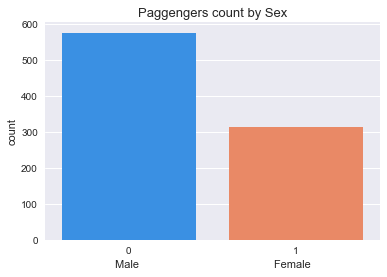

In [22]:
sns.countplot(x = 'Sex', data = titanic, palette=['dodgerblue','coral'])
plt.xlabel('Male                                             Female')
plt.title('Paggengers count by Sex',size = 13)

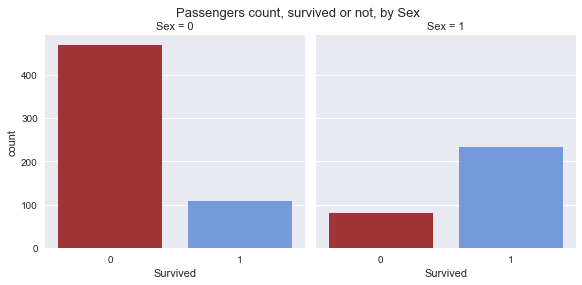

In [23]:
g = sns.factorplot("Survived", col="Sex", margin_titles=True,data=titanic,kind="count",palette=['firebrick','cornflowerblue'])
plt.subplots_adjust(top=0.88)
g.fig.suptitle('Passengers count, survived or not, by Sex', size = 13)

We can notice, thanks to the plot above, that there is an important difference in surviving between male and female. Among 577 male pasengers only 18.9 % survived, while among 314 female 74.2% survived. 
So, gender it can be considered an important factor, I will perform a chi-square Test of independence over the variables Survived as Sex at level 0.01. 
The Null hypothesis is that the two variables are independent, the alternative is that they are not independent.

In [24]:
chitest2x2(titanic['Survived'][titanic['Sex']==0],titanic['Survived'][titanic['Sex']==1])

The Chi Square score is: 263.050574071


With a Chi-Square Score of 263.05, we have a p-value is P(Χ²>263.05) ≤ 0.0001. This value is less than the significant level of 0.01 and this result allows us to do reject the null hypothesis and say that the two variables are not independent. So, we conclude that there is a relationship between, the variables Sex and Survived without considering the Alone variable analysed before.

## Alalysis of Fare variable
As said at the beginning of our study we have notice that the minimum value for fare is 0, we will go now look at this value more in detail. 

In [25]:
titanic[titanic['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
179,180,0,3,"Leonard, Mr. Lionel",0,36.0,0,0,LINE,0.0,NaN,1.0,1
263,264,0,1,"Harrison, Mr. William",0,40.0,0,0,112059,0.0,B94,1.0,1
271,272,1,3,"Tornquist, Mr. William Henry",0,25.0,0,0,LINE,0.0,NaN,1.0,1
277,278,0,2,"Parkes, Mr. Francis ""Frank""",0,NaN,0,0,239853,0.0,NaN,1.0,1
302,303,0,3,"Johnson, Mr. William Cahoone Jr",0,19.0,0,0,LINE,0.0,NaN,1.0,1
413,414,0,2,"Cunningham, Mr. Alfred Fleming",0,NaN,0,0,239853,0.0,NaN,1.0,1
466,467,0,2,"Campbell, Mr. William",0,NaN,0,0,239853,0.0,NaN,1.0,1
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",0,NaN,0,0,239854,0.0,NaN,1.0,1
597,598,0,3,"Johnson, Mr. Alfred",0,49.0,0,0,LINE,0.0,NaN,1.0,1
633,634,0,1,"Parr, Mr. William Henry Marsh",0,NaN,0,0,112052,0.0,NaN,1.0,1


We have found 15 passengers where the fare is recorded 0. This could be possible for a prize for example or a gift, but it doesn't seem always the case. 4 passengers have bought 'LINE' ticket, and they were American line employees according to some research, they should have paid 7 pound each for the ticket. 8 passengers are members of the titanic guarantee group and they win the trip over 3000 employees that worked on the titanic. 
Mr Jonkheer Johan George Reuchlin traveled for free thanks to his position with the Holland America Line. 
Fry, Mr. Richard and Harrison, Mr. William were traveling with Mr Joseph Bruce Ismay as his vallet and his secretary. 
Although this sample is well redistributed over classes, just 1 over 15 survived the accident, and we will try to remove these passengers to avoid disturbance in the next study.
Another interesting value of Fare is the maximum, that we will now check before trying to answer to our question.

In [26]:
titanic['Fare'].max()

512.32920000000001

In the describe table we saw that 75% of the passenger paid less then 31 pound, this 512 could mean that there are some extra high values over fare.

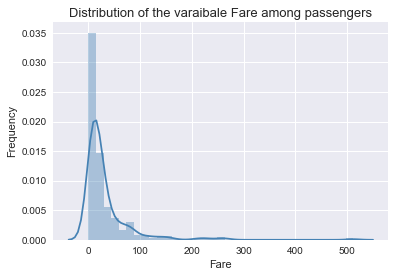

In [27]:
sns.distplot(titanic['Fare'],hist=True, rug=False, bins = 35, color = 'steelblue', axlabel = 'Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of the varaibale Fare among passengers',size = 13)

We can see in the histogram that there are values up to 300 and then nothing until the 500. We will now see them in details.  

In [28]:
titanic[titanic['Fare']>=300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
258,259,1,1,"Ward, Miss. Anna",1,35.0,0,0,PC 17755,512.3292,NaN,3.0,1
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,36.0,0,1,PC 17755,512.3292,B51 B53 B55,3.0,0
737,738,1,1,"Lesurer, Mr. Gustave J",0,35.0,0,0,PC 17755,512.3292,B101,3.0,1


Although these values seem to be correct, for the quality of the cabins reserved, I am going to try to remove these 3 passengers to permorm our study. 
I will then plot the histogramss of fare by survived or not. 

In [29]:
tit_high_o = titanic[titanic['Fare']>0]

In [30]:
tit_fare = tit_high_o[tit_high_o['Fare']<500]

In [31]:
tit_fare[['Survived','Fare']].describe()

,Survived,Fare
count,873.000000,873.000000
mean,0.387171,31.107631
std,0.487382,41.331513
min,0.000000,4.012500
25%,0.000000,7.925000
50%,0.000000,14.500000
75%,1.000000,31.275000
max,1.000000,263.000000


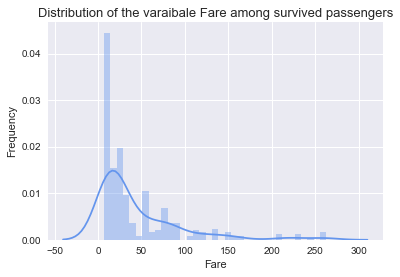

In [32]:
sns.distplot(tit_fare[tit_fare['Survived']==1]['Fare'],hist=True, rug=False, bins = 35, color = 'cornflowerblue', axlabel = 'Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of the varaibale Fare among survived passengers',size = 13)

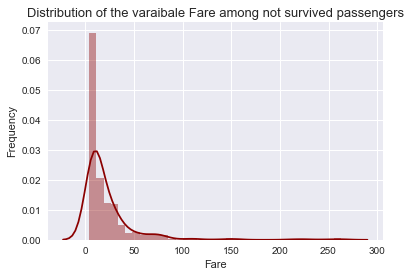

In [33]:
sns.distplot(tit_fare[tit_fare['Survived']==0]['Fare'],hist=True, rug=False, bins = 35, color = 'darkred', axlabel = 'Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of the varaibale Fare among not survived passengers',size = 13)

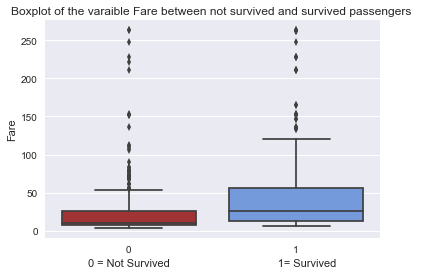

In [34]:
sns.boxplot(data = tit_fare , y = 'Fare', x = 'Survived',palette=['firebrick','cornflowerblue'])
plt.title('Boxplot of the varaible Fare between not survived and survived passengers ')
plt.xlabel('0 = Not Survived                                    1= Survived')

Although the distributions are similar shaped, we can see more in survived passenger a higher presence in higher fares. I the box plot also is possible to notice this difference between survived and not. 
we are going use the describe function to watch at the numbers of what just observed. 

In [35]:
tit_fare.groupby('Survived')['Fare'].describe()

Survived       
0         count    535.000000
          mean      22.696673
          std       31.589367
          min        4.012500
          25%        7.895800
          50%       10.500000
          75%       26.000000
          max      263.000000
1         count    338.000000
          mean      44.420834
          std       50.487368
          min        6.975000
          25%       12.475000
          50%       26.000000
          75%       56.929200
          max      263.000000
Name: Fare, dtype: float64

In [36]:
tit_fare[['Survived','Fare']].corr()

,Survived,Fare
Survived,1.000000,0.256172
Fare,0.256172,1.000000


We can see that the Pearson's correlation is 0.256, so the 2 variables are slightly positive correlated.      
the two means are 22.697 for not survived passengers and 44.421 for survived passengers. We are going to perform a one tail Welch's t-test, because, as we can see from the describing table just above, the two sample are of 535 and 338 respectively, and have quite different standard deviation.                
As null hypothesis, we are going to suppose that the two mean of the variable fare are equal and as alternative hypothesis that the mean of fare for survived passenger is higher than the mean of passengers that did not. 
the significant level will be 0.05. 
I will in this case a function in scipy package after have divided my dataset by the variable Survived.

In [37]:
tit_fare_surv = tit_fare['Fare'][tit_fare['Survived']==1]
tit_fare_not_surv = tit_fare['Fare'][tit_fare['Survived']==0]

In [38]:
scipy.stats.ttest_ind(tit_fare_surv,tit_fare_not_surv, axis=0, equal_var=False)

Ttest_indResult(statistic=7.0831705832208023, pvalue=4.7561407741698863e-12)

The value of 7.083 as t-statistic and a p-value that is less than 0.00001, allow us to reject the null hypothesis and state that the two mean are significant different, specifically the mean of the variable Fare for survived people is higher than for not survived.

## Conclusions

The dataset used in this study is just a part of all the data available of the passengers of the Titanic. As said at the beginning of this analysis, we only have used in this study only 891 passengers of 1316 total passengers. So, we couldn't perform our analysis of all the passengers.  There were as saw before some missing values,especailly Age and Cabin,  but the variables of interest of this study were not missing at all.                
Said so, we can say that we discovered, in this study, that there is an interesting relation between being alone or not and survived ratio. Although this value that come from Parch and SibSp, do not count other kind of relations, like friendship or professional relation. It could be interesting investigate also with this kind of information. 
When we looked at Gender separately, we discover that a difference behaviour. First of all, the mean of survived male alone is less than the male not alone survived, while for female these two mean are opposite, so the mean of female alone is higher. Secondly for Male the variable Survived and alone were resulted not independent, while for female we cannot say the same. 

We can say that we discover also an significant difference between the ticket fare, among passengers that survived and not.                                    
However, it could be interesting continuing this investigation, extracting the real ticket fare per person. The fare variable that we have in this data set is the fare that has been payed for the ticket all together, so in some case this fare is the correct value when the passenger was traveling alone, otherwise is the fare for the ticket for multiple persons. We could define a new variable dividing the fare by the numbers of family members (Parch + SibSb), and this could it be the fare for each passenger. But data shows that some tickets were bought for multiple passengers that were not family related, and this would create not correct values of our dataset. With more investigation and analysis this could be avoided, using the variable ticket and to look for duplicate values and use it to find the correct fare for each passenger.

## Sources

http://stackoverflow.com/questions/11869910/pandas-filter-rows-of-dataframe-with-operator-chaining       
http://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column      
http://stackoverflow.com/questions/19410042/how-to-make-ipython-notebook-matplotlib-plot-inline         
http://stackoverflow.com/questions/33458566/how-to-choose-bins-in-matplotlib-histogram        
http://www.titanic-titanic.com                 
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html                
http://stattrek.com/chi-square-test/independence.aspx?Tutorial=AP
http://math.hws.edu/javamath/ryan/ChiSquare.html
http://www.socscistatistics.com/pvalues/chidistribution.aspx
https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html
https://matplotlib.org/2.0.0/examples/color/named_colors.html
http://seaborn.pydata.org/generated/seaborn.factorplot.html
http://seaborn.pydata.org/generated/seaborn.FacetGrid.html